In [1]:
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [2]:
image_shape = (64, 64)
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=False)
n_samples, n_features = faces.shape
# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

In [3]:
borda = np.array([[-1, -1, -1],
                  [-1,  8, -1],
                  [-1, -1, -1]])
linhas_vert = np.array([[ 1,  2,  1],
                        [ 0,  0,  0],
                        [-1, -2, -1]])
linhas_hor = np.array([[ 1,  0, -1],
                       [ 2,  0, -2],
                       [ 1,  0, -1]])
sharpen = np.array([[ 0, -1, 0],
                    [-1, 5, -1],
                    [ 0, -1, 0]])
filtros = [borda, linhas_vert, linhas_hor, sharpen]
nome_filtros = ['Filtro de Bordas', 'Filtro de Linhas Verticais', 'Filtro de Linhas Horizontais', 'Filtro Sharpen']

In [4]:
results = []
for filtro in (filtros):
    results.append(convolve2d(faces[0].reshape(image_shape), filtro))

In [5]:
def relu(x): return(x>0)*x

In [6]:
relu_img = []
for result in results:
    relu_img.append(relu(result))

<IPython.core.display.Javascript object>


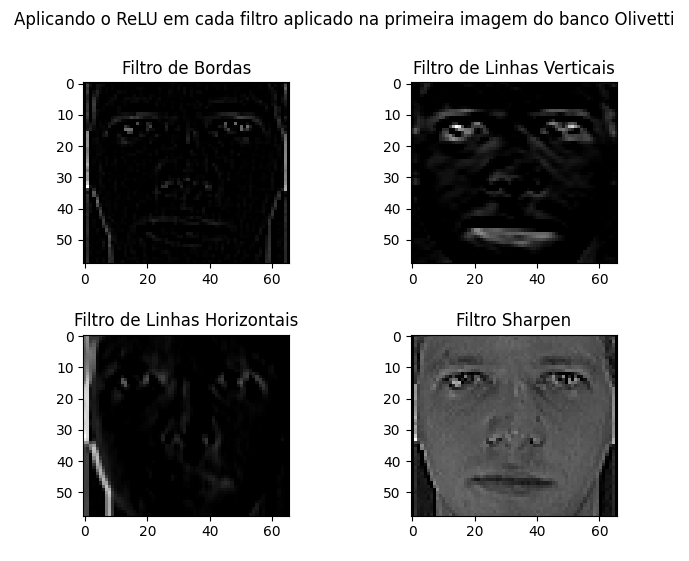

In [13]:
from math import floor
%matplotlib notebook
fig, axs = plt.subplots(2,2)
for i in range(4):
    axs[floor(i/2)][i%2].imshow(relu_img[i][2:-2][2:-2], cmap=plt.cm.gray)
    axs[floor(i/2)][i%2].set_title(nome_filtros[i])
    
fig.suptitle('Aplicando o ReLU em cada filtro aplicado na primeira imagem do banco Olivetti')
plt.tight_layout()
plt.show()

In [27]:
def maxpool(mat,ksize):

    m, n = mat.shape[:2]
    ky,kx=ksize

    _ceil=lambda x,y: int(numpy.ceil(x/float(y)))

    ny=m//ky
    nx=n//kx
    mat_pad=mat[:ny*ky, :nx*kx, ...]

    new_shape=(ny,ky,nx,kx)+mat.shape[2:]

    result=np.nanmax(mat_pad.reshape(new_shape),axis=(1,3))

    return result

In [28]:
maxpool_img = []
for result in results:
    maxpool_img.append(maxpool(result, (3,3)))

<IPython.core.display.Javascript object>


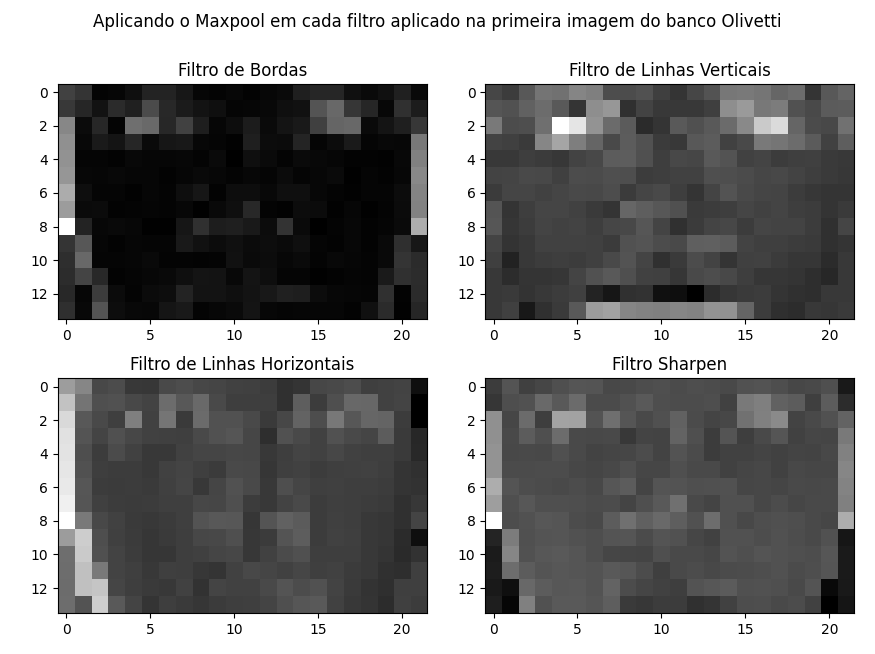

In [30]:
from math import floor
%matplotlib notebook
fig, axs = plt.subplots(2,2)
for i in range(4):
    axs[floor(i/2)][i%2].imshow(maxpool_img[i][2:-2][2:-2], cmap=plt.cm.gray)
    axs[floor(i/2)][i%2].set_title(nome_filtros[i])
    
fig.suptitle('Aplicando o Maxpool em cada filtro aplicado na primeira imagem do banco Olivetti')
plt.tight_layout()
plt.show()